In [22]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

/tmp/ipykernel_53845/950759743.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [29]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
df=pd.read_csv('H_Ludh_1_5_17-_2_12_22-*07* (copy)_INDEX_Mean.csv',index_col=0,parse_dates=[0],date_parser=parser)

In [37]:
df=df.rename(columns={'PM2.5':'PM'})
df

,PM
DATE,
2017-05-01 00:00:00,65.87
2017-05-01 01:00:00,51.67
2017-05-01 02:00:00,49.97
2017-05-01 03:00:00,56.10
2017-05-01 04:00:00,54.70
...,...
2022-12-02 21:00:00,133.00
2022-12-02 22:00:00,153.22
2022-12-02 23:00:00,149.97


<AxesSubplot:xlabel='DATE'>

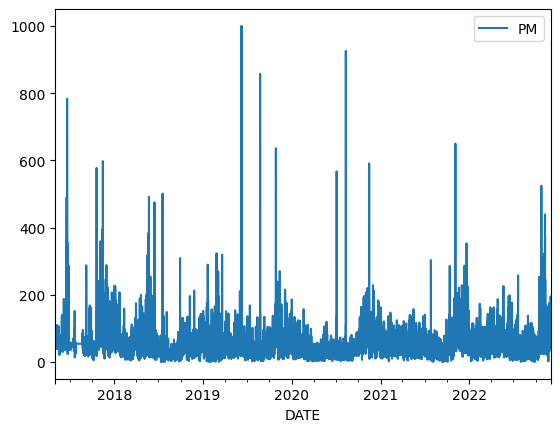

In [38]:
df.plot()

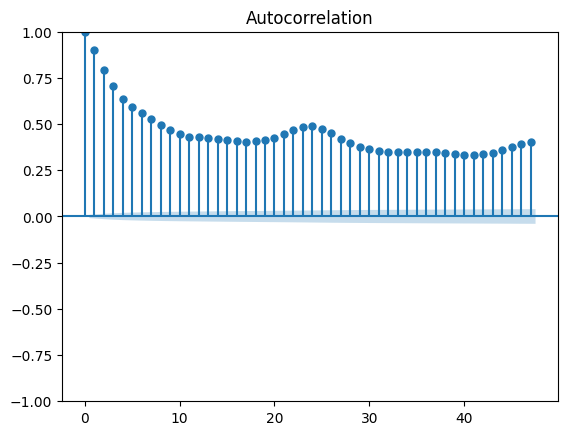

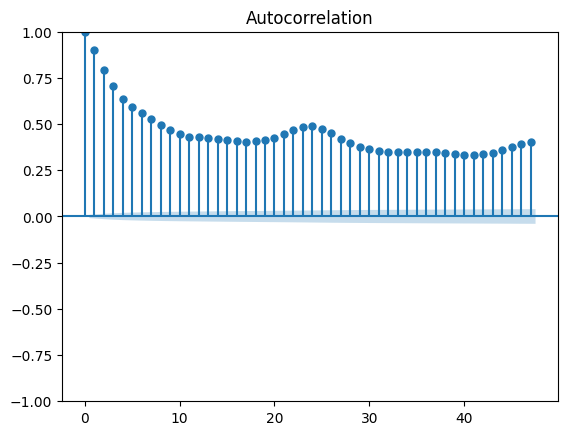

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

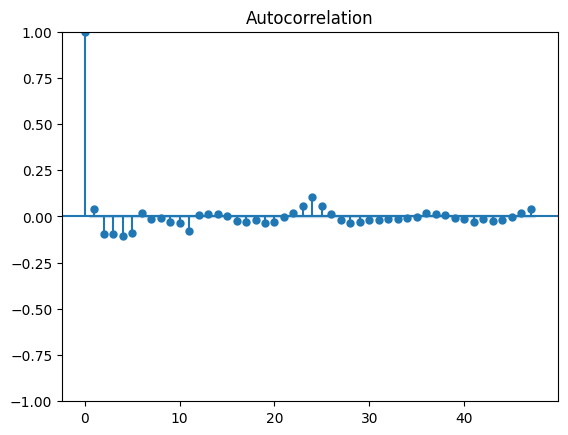

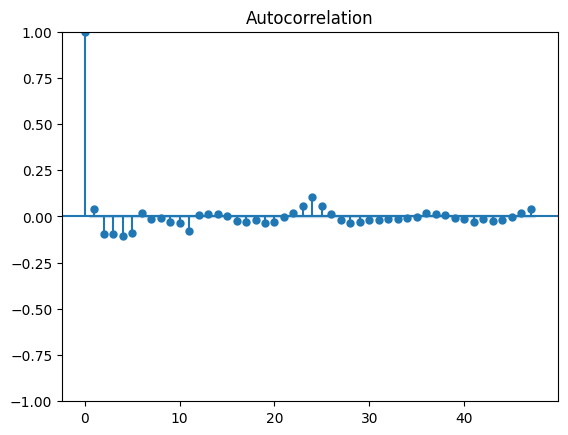

In [43]:
plot_acf(df_dif)

<AxesSubplot:xlabel='DATE'>

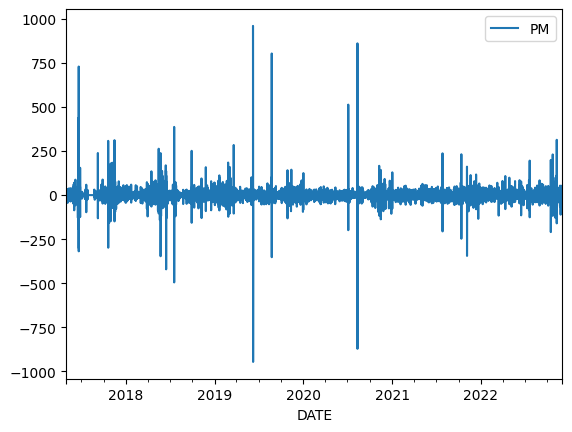

In [44]:
df_dif.plot()

In [41]:
df_dif=df.diff(periods=1)
df_dif=df_dif[1:]
df_dif

,PM
DATE,
2017-05-01 01:00:00,-14.20
2017-05-01 02:00:00,-1.70
2017-05-01 03:00:00,6.13
2017-05-01 04:00:00,-1.40
2017-05-01 05:00:00,-0.61
...,...
2022-12-02 21:00:00,25.81
2022-12-02 22:00:00,20.22
2022-12-02 23:00:00,-3.25


In [53]:
x=df.values
train=x[0:39208]
test=x[39208:]
predictions = []

In [61]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
model_ar= AutoReg(train)
model_ar_fit=model_ar.fit()

TypeError: AutoReg.__init__() missing 1 required positional argument: 'lags'

In [6]:
df=df.set_index('DATE')
df

,PM
DATE,
2017-05-01 00:00:00,65.87
2017-05-01 01:00:00,51.67
2017-05-01 02:00:00,49.97
2017-05-01 03:00:00,56.10
2017-05-01 04:00:00,54.70
...,...
2022-12-02 21:00:00,133.00
2022-12-02 22:00:00,153.22
2022-12-02 23:00:00,149.97


In [7]:
df.describe()

,PM
count,49010.000000
mean,54.180705
std,41.729365
min,0.070000
25%,29.700000
50%,47.660000
75%,64.880000
max,999.990000


<AxesSubplot:xlabel='DATE'>

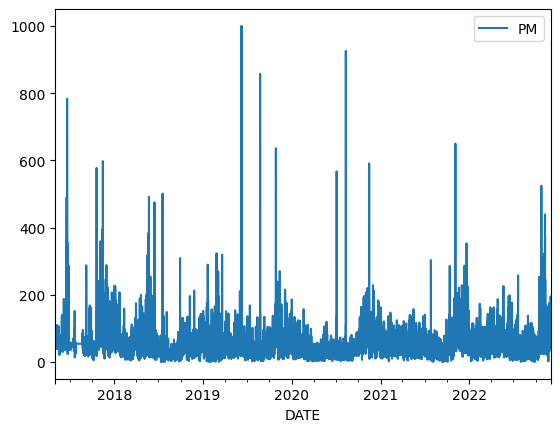

In [8]:
df.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
tst_result=adfuller(df['PM'])

In [11]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Pm):
    result=adfuller(Pm)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [12]:
adfuller_test(df['PM'])

ADF Test Statistic : -14.216465762679103
p-value : 1.686480315399363e-26
#Lags Used : 56
Number of Observations Used : 48953
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='DATE'>

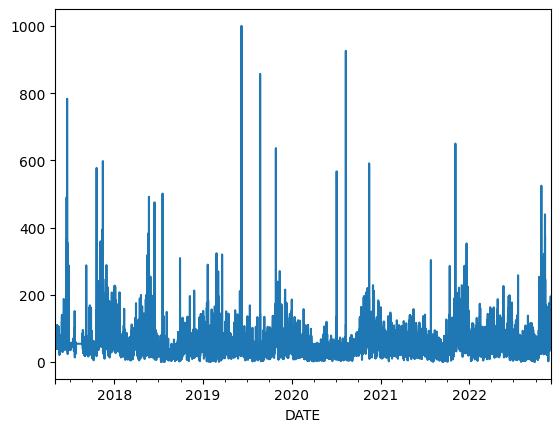

In [13]:
df['PM'].plot()

In [21]:
from pandas.tools import autocorrelation_plot
autocorrelation_plot(df['PM'])
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

NameError: name 'sm' is not defined

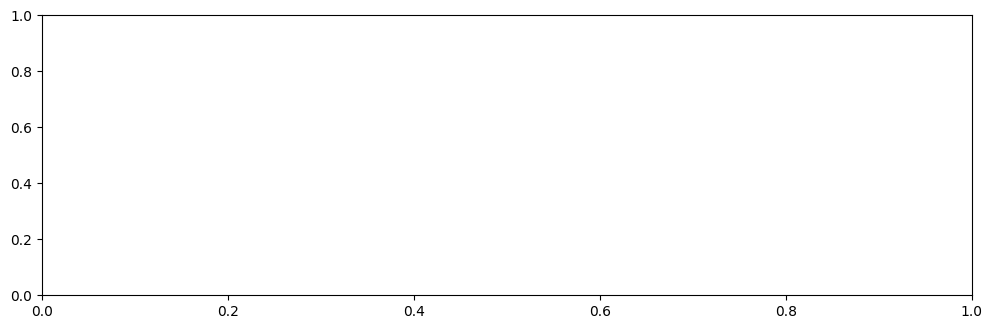

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)